In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

plt.style.use('seaborn')

In [52]:
def read_file(file): 
    f = np.genfromtxt(file,delimiter=",")
    rnge = np.r_[1,4]
    return f[:,rnge]

def plot(arr, title): 
    plt.scatter(arr[:,0],arr[:,1])
    plt.xlabel("Frequency (hz)")
    plt.xlim(arr[:,0].min(), arr[:,0].max())
    plt.ylabel("Amplitude")
    plt.ylim(arr[:,1].min()-10**(-12),arr[:,1].max()+10**(-12))
    plt.title(title)
    
    peaks = argrelextrema(arr[:,1], np.greater, order = 400)
    print(arr[:,0][peaks])
    plt.scatter(arr[:,0][peaks], arr[:,1][peaks], s=50, c='r')
    
    plt.show()
    return arr[:,0][peaks]

    
def speed_of_sound(v_1,v_2): 
    return 2*.04*(abs(v_1-v_2))

def error(lst): 
    return np.std(lst)

[ 4289.98  8560.18 12800.3  17070.  ]


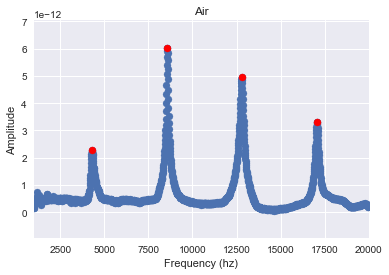

[ 4360.11  8705.58 17310.2 ]


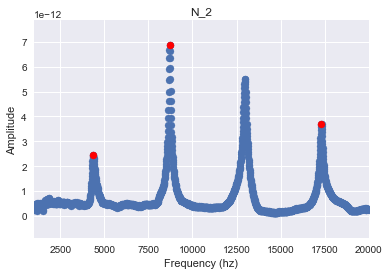

[11229.1 23010.2 34100.6]


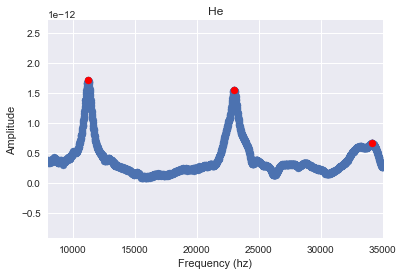

In [48]:
pwd = './data/sound_in_'
file_lst = ['air.txt','N2.txt','He.txt']
title_lst = ['Air', 'N_2', 'He']

peak_lst = []
for i in range(len(file_lst)):
    f = read_file(pwd+file_lst[i])
    peaks = plot(f, title_lst[i])
    peak_lst.append(list(peaks))

In [123]:
## Just gonna read the values out of those lists and then calculate the DeltaF
delF = [abs(4289.98-8560.18), abs(4360.11-8705.58),abs(11229.1-23010.2)] 
for i in range(len(delF)): 
    print('Speed of Sound in',title_lst[i],':',speed_of_sound(.04,delF[i]),'m/s')

Speed of Sound in Air : 341.61600000000004 m/s
Speed of Sound in N_2 : 347.6376 m/s
Speed of Sound in He : 942.488 m/s


In [49]:
## error ?????????
##I have to manually imput the peak from N_2 because it will not pick it up for some reason 
peak_lst[1].append(1/2*(peak_lst[1][1]+peak_lst[1][2]))
peak_lst[1].sort()
peak_lst

[[4289.98, 8560.18, 12800.3, 17070.0],
 [4360.11, 8705.58, 13007.89, 17310.2],
 [11229.1, 23010.2, 34100.6]]

In [55]:
speed_lst = [[],[],[]]
for i in range(len(peak_lst)): 
    for j in range(len(peak_lst[i])):
        try:
            speed_lst[i].append(speed_of_sound(peak_lst[i][j],peak_lst[i][j+1]))
        except(IndexError): 
            pass     
speed_lst

[[341.61600000000004, 339.2095999999999, 341.5760000000001],
 [347.6376, 344.18479999999994, 344.1848000000001],
 [942.488, 887.2319999999999]]

In [56]:
error_lst = []
speed_lst_true = []
for i in speed_lst: 
    error_lst.append(error(i))
    speed_lst_true.append(np.mean(i))

In [59]:
for i in range(3):
    print(title_lst[i], "Speed of sound:",speed_lst_true[i], 'pm',error_lst[i], 'm/s')

Air Speed of sound: 340.8005333333333 pm 1.1250782649319921 m/s
N_2 Speed of sound: 345.33573333333334 pm 1.6276655293872726 m/s
He Speed of sound: 914.8599999999999 pm 27.6280000000001 m/s
